### Linear Regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('headbrain.csv')

df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [9]:
headSize = df['Head Size(cm^3)'].values

brainWeight = df['Brain Weight(grams)'].values

In [11]:
# plt.plot(x, y, '.')

In [13]:
headSize_mean = headSize.mean()

brainWeight_mean = brainWeight.mean()

In [14]:
headSize_mean

3633.9915611814345

In [15]:
brainWeight_mean

1282.873417721519

In [ ]:
# y = m * x + c
# m = E(headSize-headSize_mean)*(brainWeight-brainWeight_mean)/E(headSize-headSize)**2
# c = y - m * x

In [16]:
length = len(headSize)
numer = 0
denom = 0
for i in range(length):
    numer += (headSize[i]-headSize_mean) * (brainWeight[i]-brainWeight_mean)
    denom += (headSize[i]-headSize_mean)**2
b1 = numer / denom

b0 = brainWeight_mean-(b1 * headSize_mean) 

print(b1) # slope

print(b0) # y intercept

0.26342933948939945
325.57342104944223


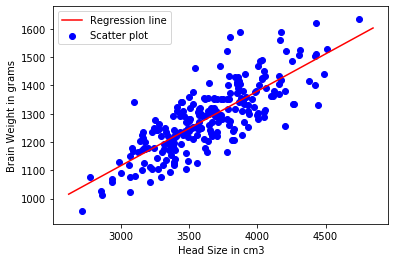

In [17]:
# plotting values and regression line

max_headSize = max(headSize) + 100

min_headSize = min(headSize) - 100

# caluclating line values of x and y
x = np.linspace(min_headSize, max_headSize, 1000)

y = b0 + b1 * x

# plotting line

plt.plot(x, y, color = 'red', label = 'Regression line')

# scatter plot

plt.scatter(headSize, brainWeight, c = 'blue', label = 'Scatter plot')

plt.xlabel('Head Size in cm3')

plt.ylabel('Brain Weight in grams')

plt.legend()

plt.show()

In [18]:
# caluclating coeficient of determination
ss_total = 0
ss_res = 0
for i in range(length):
    brainWeight_pred = b0 + b1 * headSize[i]
    ss_total +=  (brainWeight[i] - brainWeight_mean) ** 2
    ss_res += (brainWeight[i] - brainWeight_pred) ** 2

r2 = 1 - (ss_res/ss_total)
print("R^2 score")
print(r2)

R^2 score
0.6393117199570003


## Using sklearn

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [24]:
# collecting X and Y 

X = data['Head Size(cm^3)'].values

Y = data['Brain Weight(grams)'].values

m = len(X)

X = X.reshape((m, 1))

# model initialization

reg = LinearRegression()

# Data Fittig

reg = reg.fit(X, Y)

# Y predict

Y_predict = reg.predict(X)

#print(X)

#print(Y)

reg.predict([[3000]])

array([1115.86143952])

In [25]:
# Model Evaluation

r2 = reg.score(X, Y)

r2

0.639311719957

In [28]:
# arr = np.random.randint(1, 100, 30)

In [32]:
# np.linspace(max(arr), min(arr), 5)

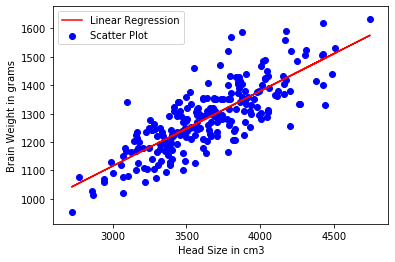

In [44]:
Y_predict

x

plt.plot(headSize, Y_predict, color = 'red', label = 'Linear Regression')

plt.scatter(headSize, brainWeight, color = 'blue', label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')

plt.ylabel('Brain Weight in grams')

plt.legend()

plt.show()